# Rechercher dans un texte

## Les algorithmes de Knuth, Morris et Pratt et de Boyer Moore

Ces deux algorithme ont été présentés <a href="https://gitlab-fil.univ-lille.fr/diu-eil-lil/portail/-/blob/master/bloc4-5/algo-texte/algo-texte.pdf">lors d'une séance précédente</a>.  
Le présent calepin a pour but d'implanter ces algorithmes en python.

### KMP

#### Les bords

L'algorithme de Knuth, Morris et Pratt repose sur la fonction
`decalages_bords(m)` prenant en paramètre un motif `m` et qui renvoie la liste des longueurs des bords du motif.

Pour rappel :
- un bord strict d'un mot $m$ est un mot $b$ qui est en même temps préfixe et suffixe de $m$, sans être égal à $m$ ;
- on cherche les bords stricts de tous les préfixes du motif ;
- ces bords stricts doivent être suivis par un caractère différent, au niveau du préfixe et du suffixe, pour correspondre à un décalage potentiellement intéressant ;
- lorsque l'on a un tel bord, on peut, en cas de non correspondance, décaler le motif en fonction de la longueur de ce bord.

Par exemple pour le mot $m=$`aaba`, il y a 5 préfixes à considérer : les préfixes de longueur 0 à 4.

[![Figures d'illustration du calcul pour les préfixes](kmp_shift_small.jpg)](kmp_shift.png)

* Préfixe vide : le plus long bord est le mot vide qui est suivi, en tant que préfixe ou suffixe, par un `a` dans la suite de $m$. Nous n'avons pas identifié de bord respectant la contrainte d'être suivi par deux caractères différents.
* Préfixe de longueur 1 : `a`. Le plus long bord de ce mot est le mot vide. Ce bord, en tant que préfixe, est suivi par un `a` et, en tant que suffixe (en allant consulter ce qui suit dans $m$) par un `a`. Là non plus cela ne respecte pas la définition
* Préfixe de longueur 2 : `aa`. Le plus long bord de ce mot est `a`. En tant que préfixe il est suivi par un `a`, en tant que suffixe il est suivi, dans $m$, par un `b`. Cela respecte donc la définition.
* Préfixe de longueur 3 : `aab`. Le plus long bord de ce mot est le mot vide qui est suivi par un `a` aussi bien en tant que préfixe qu'en tant que suffixe. Nous n'avons donc pas identifié de bord respectant la définition.
* Préfixe de longueur 4 : `aaba`. Le plus long bord de ce mot est `a` qui, en tant que préfixe, est suivi par un `a` et en tant que suffixe est suivi par le mot vide (puisque on atteint la fin de $m$). Cela respecte donc la définition.


Voici le pseudo-code de cette fonction :

**décalages_bords**  
**Entrée :** le motif $P$  
**Sortie :** la liste des longueurs des bords des préfixes de $P$ respectant la définition ci-dessus, on mettra -1 si un tel bord n'existe pas
1.  $m\leftarrow longueur(P)$
2.  $\pi\leftarrow liste\_vide()$
3.  ajouter $-1$ à $\pi$                               // le préfixe de longueur 0 n'a pas de bord respectant la définition ci-dessus
4.  $k\leftarrow -1$                                 // on commence avant le motif
6.  **Pour** $q$ **allant de** $0$ à $m-1$             
7.  $\quad$ **Tant que** $k>-1$ et $P[k]\neq P[q]$   // P[:k] n'est pas un suffixe de P[:q] → on n'a pas un bord
8.  $\quad\quad$ $k \leftarrow \pi[k]$               // bord précédent
9.  $\quad$ **Fin Tant que**
10. $\quad$ $k\leftarrow k+1$
12. $\quad$ **Si** $q+1<m$ et $P[k]=P[q+1]$ **alors**              // les caractères qui suivent le bord sont-ils identiques ?
13. $\quad\quad$ ajoute $\pi[k]$ à $\pi$              // oui : on se contentera du bord précédent 
14. $\quad$ **Sinon**
15. $\quad\quad$ ajoute $k$ à $\pi$                   // non : on enregistre la longueur du bord
16. **Fin pour**
17. **renvoyer** $\pi$

**à faire**  
Déterminer les décalages du motif `ababab`

**à faire**  
Implanter cet algorithme en python

In [30]:
def decalages_bords(motif):
    """
    :param motif: (str) un motif
    :return: (list of int) La liste des décalages possibles
    :Exemple:

    >>> decalages_bords("ababa")
    [-1, 0, -1, 0, -1, 3]
    """
    pass

**à faire**  
On donne une fonction permettant de trouver les $k$ mots les plus
intéressants pour KMP. (ceux qui ont les plus longs décalages possibles).

Utiliser cette fonction pour trouver dans les misérables les 10 mots les plus intéressants (pour KMP). On rappelle que pour lire toutes les lignes d'un fichier on peut utiliser la fonction `read`:
```python
with open('les-miserables.txt') as filin:
    contenu = filin.read()
```

In [31]:
def cherche_mots_interessants(texte, k):
    """
    recherche les k mots les plus intéressants pour kmp dans le texte 
    """
    import re
    mots = set(re.split('\W+', texte))
    res = list()
    for mot in mots:
        m = max(decalages_bords(mot))
        res.append( (m, mot) )
        res = sorted(res, reverse = True)[:k]
    return [ mot[1] for mot in res ]

#### L'algorithme 

On donne maintenant le pseudo-code de l'algorithme de KMP :

**Recherche_KMP**  
**Entrées :** le texte $T$, le motif $P$.  
**Sortie :** La liste de tous les indices de $P$ dans $T$.  

1.  $n \leftarrow longueur(T)$
2.  $m \leftarrow longueur(P)$
3.  $\pi \leftarrow decalages\_bords(P)$
4.  $res \leftarrow liste\_vide()$
5.  $q \leftarrow 0$                       // nombre de caractères comparés avec succès
6.  **Pour** $i$ **allant de** $0$ **à** $n-1$     // parcours le texte de gauche à droite
7.  $\quad$ **Tant que** $q>-1$ et $P[q]\neq T[i]$
8.  $\quad\quad$ $q\leftarrow \pi[q]$          // le caractère suivant ne convient pas
9.  $\quad$ **Fin Tant que**
10. $\quad$ $q\leftarrow q+1$
11. $\quad$ **Si** $q = m$ **Alors**          // tous les caractères conviennent ?
12. $\quad\quad$ ajouter $i+1-m$ à $res$     // ajoute l'indice du début
13. $\quad\quad$ $q \leftarrow \pi[q]$      // cherche l'occurrence suivante
14. $\quad$ **Fin Si**
15. **Fin Pour**
16. **Renvoyer** $res$.

**à faire**  
Implanter en python l'algorithme de KMP.

In [32]:
def kmp_search(texte, motif):
    """
    :param texte: (str) un texte
    :param motif: (str) un motif 
    :return: (list) la liste des occurences de motif dans texte
    :Exemple:

    >>> kmp_search('aabbabbabaa', 'abba')
    [1, 4]
    """
    pass

### Boyer Moore

L'algorithme de Boyer-Moore repose sur deux règles :
- celle du bon décalage, implantée dans `bons_decalages`;
- celle du bon bon suffixe, implantée dans `bons_suffixes`.

La deuxième règle peut être omise, conduisant à une version simplifiée  
de l'algorithme, appelé algorithme de Boyer Moore Horspool.

Nous donnons ici les deux versions de l'algorithme. On commence par l'algorithme associant à chaque lettre de l'alphabet 
son décalage selon la règle du bon décalage :

**bons_decalages**  
**Entree** un motif $P$, un alphabet $\Sigma$.  
**Sortie** un dictionnaire dont les clés sont les lettres de l'alphabet et les valeurs associées 
sont les décalages occasionnés chaque lettre.  

1.  $res\leftarrow dictionnaire\_vide()$
2.  $m\leftarrow longueur(P)$
3.  **Pour** chaque lettre $c$ de $\Sigma$ **faire**
4.  $\quad$ ajoute à $res$ l'association $c$ : m
5.  **Fin Pour**
6.  **Pour** $i$ **allant de** 0 à $m-2$ **faire**
7.  $\quad$ ajoute à $res$ l'association $P[i]$ : $m-1-i$
8.  **Fin pour**
9.  **renvoyer** $res$

Par exemple, pour le motif `m = GCAGAGAG`, on imagine que la
comparaison entre la lettre $c$ du texte et la dernière lettre
du motif n'est pas concluante ($c\neq G$), alors :

- Si $c$ est un `A`, alors on peut décaler de 1;
- Si $c$ est un `C`, alors on peut décaler de 6;
- Si $c$ est un `T`, alors on peut décaler de 8;
- Si $c$ est un `G`, alors on peur décaler de 2. (impossible pour ce motif).

**à faire** 

Implanter cette fonction en python.

In [8]:
def bons_decalages(motif, alphabet):
    """
    :param motif: (str) le motif
    :param alphabet: (set) l'alphabet utilisé
    :return: (dict) le dictionnaire associant à chaque lettre de alphabet
    l'indice de sa denière occurrence dans motif, -1 sinon
    :Exemple:

    >>> bons_decalages("abbabc", set("abcd")) == { 'a' : 2, 'b' : 1, 'c' : 6, 'd' : 6 }
    True
    """
    pass  

#### Boyer-Moore-Horspool

Dans cette version, on n'utilise que la règle du bon décalage. Pour des élèves de nsi, cela nous semble suffisant.

**Boyer-moore-horspool**  
**Entrees :** Un texte $T$, un motif $P$, un alphabet $\Sigma$  
**Sortie :** La liste des indices des occurrences de $P$ dans $T$

1.  $n\leftarrow longueur(T)$
2.  $m\leftarrow longueur(P)$
3.  $j\leftarrow 0$
5.  $bd\leftarrow bons\_decalages(motif, \Sigma)$       // initialise les décalages
6.  $res \leftarrow liste\_vide()$
7.  **Tant que** $j < n - m$ **faire**      // Tant qu'on peut trouver
8.  $\quad$ $i \leftarrow m-1$              // Part de la fin du motif
9.  $\quad$ **Tant que** $i>=0$ et $P[j]=T[i+j]$ **faire**   // Tant que les caractères correspondent
10. $\quad\quad$ $i\leftarrow i-1$
11. $\quad$ **Fin Tant que**
12. $\quad$ **Si** $i<0$ **Alors**    // A-t-on trouvé un motif ?
13. $\quad\quad$ ajoute $j$ à $res$        // oui
14. $\quad\quad$ $d\leftarrow bd[ T[j + m - 1] ]$ // on aligne le dernier symbole
18. $\quad$ **Sinon**
19. $\quad\quad$ $d\leftarrow max(1, bd[ T[j + i] ] - (m - 1 - i))$   // on décale vers la droite
22. $\quad$ **Fin Si**
22. $\quad$ $j \leftarrow j + d$
23. **Fin Tant que**
24. **Renvoyer** \(res\)

Par exemple, lors de la recherche de `GCAGAGAG` dans `GCATCGCAGAGAGTATACAGTACG` :
- on commence par comparer `GCAGAGAG` avec `GCATCGCA`. `G` étant différent de `A`, on décale de 1 ;
- on compare `GCAGAGAG` avec `CATCGCAG`. `G` étant différent de `C`, on décale de 4 = 6 - 2 ;
- on compare `GCAGAGAG` avec `GCAGAGAG` . La comparaison est fructueuse, on décale ensuite de 2 ; 
- on compare `GCAGAGAG` avec `AGAGAGTA`. `G` étant différent de `A`, on décale de 1;
- on compare `GCAGAGAG` avec `GAGAGTAT`. `G` étant différent de `T`, on décale de 8.
- on compare `GCAGAGAG` avec `ACAGTACG`. `A` étant différent de `C`, on décale de 5 = 6 -1
- l'algorithme s'arrête car $j=21 > 24 - 7$.

La fonction suivante implante cet algorithme

In [47]:
def boyer_moore_horspool_search(texte, motif):
    """
    :param texte: (str) un texte
    :param motif: (str) un motif 
    :return: (list) la liste des occurences de motif dans texte
    :Exemple:
    
    >>> boyer_moore_horspool_search('aabbabbabaa', 'abba')
    [1, 4]
    """
    bd = bons_decalages(P, set(texte))
    n, m = len(T), len(P)
    res = []
    j = 0
    while j <= n - m:
        i = m - 1
        while i >=0 and P[i] == T[i+j]:
            i = i - 1
        if i < 0:
            res.append(j)
            d = bd[texte[j + m - 1]]
        else:
            d = max(1, bd[texte[i+j]] - ( m - 1 - i ) )
        #print("dacalage = {}".format(d))
        j += d
    return res

#### Le bon suffixe

L'algorithme complet de Boyer-Moore utilise également la règle du bon suffixe. 

Il s'agit de trouver, pour un suffixe $a\cdot u$ du motif, une sous-chaîne du motif de la forme $b\cdot u$, avec $a\neq b$ qui soit la plus à droite du suffixe.

Si une telle chaîne n'existe pas, alors on cherche un bord du suffixe.
La programmation de cette recherche peut être difficile, surtout si elle doit s'effectuer en temps linéaire.

On fournit une version efficace de cette recherche  :

In [48]:
def longueurs_suffixes_communs(P):
    """
    :param P: (str) un motif
    :return: (list) la table des longueurs des plus grands 
    suffixes commun entre P[:i] et P
    
    >>> longueurs_suffixes_communs('aababa')
    [1, 1, 0, 3, 0, 6]
    """
    m = len(P)
    g = m-1
    res = [ 0 ] * m
    res[m-1] = m
    for i in range(m-2, -1, -1):
        if i > g and res[i+m-1-f] != i - g:
            res[i] = min( res[i+m-1-f], i-g)
        else:
            g = min(i, g)
            f = i
            while g >= 0 and P[g] == P[g+m-1-f]:
                g = g-1
            res[i] = f - g
    return res

def bons_suffixes(P):
    """
    :param P: (str) un motif
    :return! (list) la table des décalages pour la règle du bon suffixe
    
    >>> bons_suffixe('aababa')
    [ 5, 5, 2, 5, 4, 1 ]
    """
    m = len(P)
    lsc = longueurs_suffixes_communs(P)
    res = [ m ] * m
    i = 0
    for j in range(m-1, -1, -1):
        if lsc[j] == j + 1:
            while i < m-1-j:
                if res[i] == m:
                    res[i] = m-1-j
                i = i+1
    for j in range(0,m-1):
        res[m-1-lsc[j]] = m-1-j
    return res

Par exemple, les bons suffixes de la chaîne `aababa` :

- pour le suffixe `''`, on a `a` ou `b`. On retient `b` (on ne veut pas de `a` avant), ce qui induit un décalage de 1 ;
- pour le suffixe `a`, on a `aa` ou `ba`. On ne retient que `aa` (on ne veut pas un `b`) qui induit un décalage de 4 ;
- pour le suffixe `ba`, aucune sous-chaine ne convient ; et aucun alignement de bord possible. Le décalage est 5; 
- pour le suffixe `aba`, on a `aaba`, ce qui implique un décalage de 2 ; 
- ...

On peut enfin écrire une fonction implantant l'algorithme de Boyer-Moore.  
Cette fonction compare à chaque étape le décalage induit par la règle du bon caractère avec celui induit par la règle du bon suffixe :

In [50]:
def boyer_moore_search(T, P):
    """
    :param texte: (str) un texte
    :param motif: (str) un motif 
    :return: (list) la liste des occurences de motif dans texte
    :Exemple:
    
    >>> boyer_moore_search('aabbabbabaa', 'abba')
    [1, 4]
    """
    bs = bons_suffixes(P)
    bd = bons_decalages(P, set(T))
    n, m = len(T), len(P)
    res = []
    j = 0
    while j <= n - m:
        i = m-1
        while i >=0 and P[i] == T[i+j]:
            i = i -1
        if i < 0:
            res.append(j)
            j = j + bs[0]
        else:
            j = j + max(bs[i],
                        bd[ T[i+j]] - m + 1 + i)
    return res

## Comparaison des différents algorithmes 

On donne ci-dessous la définition d'une fonction python implantant une recherche non améliorée.


In [4]:
def simple_search(texte, motif):
    """
    :param texte: (str) un texte
    :param motif: (str) un motif 
    :return: (list) la liste des occurences de motif dans texte
    :Exemple:
      
    >>> simple_search('aabbabbabaa', 'abba')
    [1, 4]
    """
    j = 0
    n = len(texte)
    m = len(motif)
    res = []
    i = 0
    for i in range(n):
        j = 0
        while j < m and i+j < n and texte[i+j] == motif[j]:
            j = j+1
        if j == m:
            res.append(i)
    return res

Nous allons comparer les trois algorithmes :
- celui, naïf, où le décalage est toujours de un caractère ;
- celui de Knuth, Morris et Pratt ; 
- celui de Boyer, Moore, Horspool.

Les comparaisons vont être effectuées sur le temps d'exécution des algorithmes. Nous allons utiliser la bibliothèque `timeit` pour les mesures, et la bibliothèque `pyplot` pour les tracés : 

In [2]:
from timeit import timeit
import matplotlib.pyplot as plt

Voici des instructions permettant de générer la liste des temps d'exécution de la fonction `simple_search` sur des extraits des *misérables* :

In [5]:
with open('les-miserables.txt', 'r') as f:
    txt = f.read()
n = len(txt)
LONGUEURS = range(0, n, n // 10) # 10 mesures
NB_REP = 5 # 5 répétitions
setup = "from __main__ import txt, simple_search"
temps = []
motif = 'quinquina'
for l in LONGUEURS:
    stmt = "simple_search(txt[:{}], '{}')".format(l, motif)
    temps.append(timeit(setup=setup, stmt=stmt, number=NB_REP))

temps

[6.557907909154892e-06,
 0.10411127610132098,
 0.15977013483643532,
 0.2345886779949069,
 0.2985197810921818,
 0.38057239912450314,
 0.44936110312119126,
 0.5233916940633208,
 0.5995115009136498,
 0.6875286479480565,
 0.7520381459034979]

L'obtention d'une courbe se fait alors simplement :

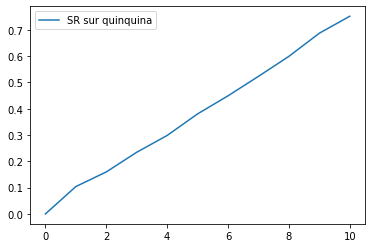

In [7]:
plt.plot(temps, label="SR sur quinquina")
plt.legend()

**à faire**  
Réaliser plusieurs graphiques permettant de comparer les trois algorithmes :

- Comparer les trois algorithmes en utilisant un motif interessant pour KMP en faisant varier la longueur du texte ;
- Comparer avec un motif moins interessant et de même longueur pour constater l'impact ;
- Comparer avec un motif sans répétitions. 